### Import Programs

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import datetime as dt

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas.core import datetools

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, average_precision_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


### Import Dataset from Excel file

These are the files produced in the previous Python notebook that performed cleansing and initial feature reduction.

In [12]:
X_unscaled = pd.read_csv('data/HID_features.csv', index_col=0)
df_clean = pd.read_csv('data/df_clean.csv', index_col=0)

In [13]:
type(X_unscaled)

pandas.core.frame.DataFrame

In [14]:
X_unscaled.shape

(4846, 36)

In [15]:
X_unscaled.columns

Index(['Auto_Ship_Ind', 'Interior_Decor_Signage_Available_Funds',
       'LMS_Enrolled', 'LMS_Available_Matching_Funds',
       'LMS_Used_Funds_Most_Recent_3_Months',
       'LMS_Used_Funds_Previous_3_Months', 'Open_Smart', 'PIP_Program',
       'PQS_Program', 'SCS_Program', 'Spar_Coverage_Ind',
       'Specialty_Solutions', 'Vaccine_Items', 'Vaccine_Starter',
       'Vaccine_Items_Count', 'Vaccine_Items_Sls_Amt', 'YPO', 'Tot_Sls_Amt',
       'DLC_Program_encoded', 'FEM_Program_encoded',
       'HM_Circular_Program_encoded', 'Internal_Decor', 'PQS_Enrolled_encoded',
       'ST_encoded', 'Pog_Code_Name_encoded', 'DC_Name_encoded',
       'Bus_Type_Desc_encoded', 'Region_encoded', 'PSAO_Expanded_encoded',
       'Chain_Name_encoded', 'Salesperson_encoded', 'AH_Program_encoded',
       'OTC_Front-end_Size_encoded', 'MRA_Program_Type_-_Active_AH_encoded',
       'Msa_Dma_encoded', 'Signage_Program_encoded'],
      dtype='object')

In [16]:
X_unscaled.head()

,Auto_Ship_Ind,Interior_Decor_Signage_Available_Funds,LMS_Enrolled,LMS_Available_Matching_Funds,LMS_Used_Funds_Most_Recent_3_Months,LMS_Used_Funds_Previous_3_Months,Open_Smart,PIP_Program,PQS_Program,SCS_Program,...,Bus_Type_Desc_encoded,Region_encoded,PSAO_Expanded_encoded,Chain_Name_encoded,Salesperson_encoded,AH_Program_encoded,OTC_Front-end_Size_encoded,MRA_Program_Type_-_Active_AH_encoded,Msa_Dma_encoded,Signage_Program_encoded
Account,,,,,,,,,,,,,,,,,,,,,
10491,1,1724.0,1,822.0,1,1,0,1,1,1,...,0,3,16,39,1,4,1,7,183,0
17475,1,0.0,1,0.0,1,1,0,0,1,1,...,0,3,0,39,1,0,3,3,190,0
19901,0,0.0,1,0.0,1,1,0,1,1,1,...,0,3,0,39,1,0,4,2,183,0
309745,0,2500.0,1,0.0,0,0,0,0,0,0,...,0,3,0,39,1,0,1,8,183,3
652229,0,0.0,1,340.0,1,0,0,0,1,0,...,0,3,0,38,1,0,0,8,183,0


In [17]:
y = df_clean['340B_Active']

### Try some models and look at performance metrics and important features

In [21]:
scaler = StandardScaler()
scaler.fit(X_unscaled)
scaled_features = scaler.transform(X_unscaled)
X = pd.DataFrame(scaled_features,columns=X_unscaled.columns, index=X_unscaled.index)

In [56]:
X.shape

(4846, 36)

In [23]:
type(X)

pandas.core.frame.DataFrame

In [24]:
type(y)

pandas.core.series.Series

In [25]:
X.head()

,Auto_Ship_Ind,Interior_Decor_Signage_Available_Funds,LMS_Enrolled,LMS_Available_Matching_Funds,LMS_Used_Funds_Most_Recent_3_Months,LMS_Used_Funds_Previous_3_Months,Open_Smart,PIP_Program,PQS_Program,SCS_Program,...,Bus_Type_Desc_encoded,Region_encoded,PSAO_Expanded_encoded,Chain_Name_encoded,Salesperson_encoded,AH_Program_encoded,OTC_Front-end_Size_encoded,MRA_Program_Type_-_Active_AH_encoded,Msa_Dma_encoded,Signage_Program_encoded
Account,,,,,,,,,,,,,,,,,,,,,
10491,1.266482,0.378602,0.471375,-0.227769,1.417723,1.438413,-0.29872,1.557934,0.578780,0.871930,...,-0.187447,1.450286,3.431431,0.974998,-1.695111,2.785719,-0.900617,0.488720,1.538394,-1.191011
17475,1.266482,-1.245755,0.471375,-0.599414,1.417723,1.438413,-0.29872,-0.641876,0.578780,0.871930,...,-0.187447,1.450286,-0.368061,0.974998,-1.695111,-0.456453,0.065811,-1.154818,1.650666,-1.191011
19901,-0.789589,-1.245755,0.471375,-0.599414,1.417723,1.438413,-0.29872,1.557934,0.578780,0.871930,...,-0.187447,1.450286,-0.368061,0.974998,-1.695111,-0.456453,0.549025,-1.565702,1.538394,-1.191011
309745,-0.789589,1.109752,0.471375,-0.599414,-0.705357,-0.695211,-0.29872,-0.641876,-1.727772,-1.146881,...,-0.187447,1.450286,-0.368061,0.974998,-1.695111,-0.456453,-0.900617,0.899605,1.538394,1.533602
652229,-0.789589,-1.245755,0.471375,-0.445692,1.417723,-0.695211,-0.29872,-0.641876,0.578780,-1.146881,...,-0.187447,1.450286,-0.368061,0.913989,-1.695111,-0.456453,-1.383831,0.899605,1.538394,-1.191011


In [26]:
# Split the data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.feature_importances_
pred_rf = rf.predict(X_test) 
rf_score_acc = np.mean(cross_val_score(rf, X_train, y_train, cv=5))
rf_score_recall = recall_score(y_test, pred_rf)
rf_score_avgprecision = average_precision_score(y_test, pred_rf)

print("Accuracy Score cross-validated: ", rf_score_acc)
print("Recall Score: ", rf_score_recall)
print("Precision Score average:  ", rf_score_avgprecision)

Accuracy Score cross-validated:  0.835480217209
Recall Score:  0.186379928315
Precision Score average:   0.246087433037


The most important measure for this business problem is Recall.  This is because Recall captures how many actual Positives the model finds.  In other words, does the model correctly predict current contract pharmacies of Macro Helix?   We want a model that can recognize an actual contract pharmacy.  Precision is not as important, as this captures how many the model labels as positive, compared to how many of those actually are positive; since we know that most of the pharmacies are not currently contract pharmacies, this measure is not very useful to the problem.  Similarly, Accuracy/R2 is not as important because since most in the dataset are negative, the model could merely predict all are negative and have a great Accuracy/R2 score -- not very meaningful.

In [29]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.feature_importances_
pred_dt = dt.predict(X_test) 
dt_score_acc = np.mean(cross_val_score(dt, X_train, y_train, cv=5))
dt_score_recall = recall_score(y_test, pred_dt)
dt_score_avgprecision = average_precision_score(y_test, pred_dt)

print("Accuracy Score cross-validated: ", dt_score_acc)
print("Recall Score: ", dt_score_recall)
print("Precision Score average:  ", dt_score_avgprecision)

Accuracy Score cross-validated:  0.761554355667
Recall Score:  0.379928315412
Precision Score average:   0.237203209723


In [30]:
feature_imp_dt = pd.DataFrame({'Feature Importance' : dt.feature_importances_}, index=X.columns)
print(feature_imp_dt)

                                        Feature Importance
Auto_Ship_Ind                                     0.007996
Interior_Decor_Signage_Available_Funds            0.055260
LMS_Enrolled                                      0.004314
LMS_Available_Matching_Funds                      0.073022
LMS_Used_Funds_Most_Recent_3_Months               0.013859
LMS_Used_Funds_Previous_3_Months                  0.002598
Open_Smart                                        0.005068
PIP_Program                                       0.004110
PQS_Program                                       0.001811
SCS_Program                                       0.013659
Spar_Coverage_Ind                                 0.008423
Specialty_Solutions                               0.003302
Vaccine_Items                                     0.003228
Vaccine_Starter                                   0.018222
Vaccine_Items_Count                               0.012768
Vaccine_Items_Sls_Amt                             0.0451

In [31]:
# Gradient Boosting

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb.feature_importances_
pred_gb = gb.predict(X_test) 
gb_score_acc = np.mean(cross_val_score(gb, X_train, y_train, cv=5))
gb_score_recall = recall_score(y_test, pred_gb)
gb_score_avgprecision = average_precision_score(y_test, pred_gb)

print("Accuracy Score cross-validated: ", gb_score_acc)
print("Recall Score: ", gb_score_recall)
print("Precision Score average:  ", gb_score_avgprecision)

Accuracy Score cross-validated:  0.831794072845
Recall Score:  0.154121863799
Precision Score average:   0.234700528202


In [33]:
# show which features are most important

def plot_feature_importance(model, df):
    cols = []
    for col in df.columns:
        cols.append(col)

    feature_importances = pd.DataFrame({'Feature Importance' : model.feature_importances_}, index=cols)
    feature_importances = feature_importances.sort_values(by='Feature Importance')
    feature_importances.plot(kind='barh', color='r', figsize=(6,6))
    plt.title('Feature Importance', fontsize=18)
    plt.tight_layout()
    plt.savefig('figures/feat_import.png', dpi=300)

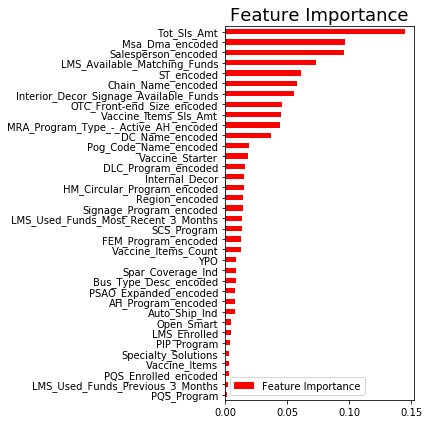

In [34]:
plot_feature_importance(dt, X_test)              ### drop in the model with best recall here 

### Try Logistic Regression Model

In [35]:
model = sm.Logit(y, X)
result = model.fit()
result.summary ()

Optimization terminated successfully.
         Current function value: 0.665322
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            340B_Active   No. Observations:                 4846
Model:                          Logit   Df Residuals:                     4810
Method:                           MLE   Df Model:                           35
Date:                Wed, 28 Mar 2018   Pseudo R-squ.:                 -0.4418
Time:                        10:38:13   Log-Likelihood:                -3224.2
converged:                       True   LL-Null:                       -2236.3
                                        LLR p-value:                     1.000
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Auto_Ship_Ind                              0.0946      0.033      2.847      0.004       0.029       0.160
Interior_Decor_Signage_Available_Funds     0.0144      0.041      0.355      0.723      -0.065       0.094
LMS_Enrolled                               0.0186      0.035      0.531      0.596      -0.050       0.087
LMS_Available_Matching_Funds               0.1133      0.035      3.258      0.001       0.045       0.181
LMS_Used_Funds_Most_Recent_3_Months        0.0286      0.044      0.643      0.520      -0.059       0.116
LMS_Used_Funds_Previous_3_Months          -0.0116      0.044     -0.262      0.794      -0.099       0.076
Open_Smart                                -0.0361      0.032     -1.128      0.259      -0.099       0.027
PIP_Program                                0.0069      0.037      0.187      0.852      -0.065       0.079
PQS_Program                               -0.0231      0.043     -0.540      0.590      -0.107       0.061
SCS_Program                                0.1021      0.039      2.605      0.009       0.025       0.179
Spar_Coverage_Ind                         -0.0102      0.039     -0.265      0.791      -0.086       0.065
Specialty_Solutions                       -0.1227      0.031     -3.906      0.000      -0.184      -0.061
Vaccine_Items                             -0.0175      0.040     -0.440      0.660      -0.096       0.061
Vaccine_Starter                            0.0116      0.030      0.390      0.696      -0.047       0.070
Vaccine_Items_Count                       -0.0277      0.047     -0.587      0.557      -0.120       0.065
Vaccine_Items_Sls_Amt                      0.0909      0.044      2.081      0.037       0.005       0.176
YPO                                        0.0076      0.034      0.228      0.820      -0.058       0.073
Tot_Sls_Amt                                0.0294      0.031      0.960      0.337      -0.031       0.089
DLC_Program_encoded                        0.0075      0.036      0.205      0.837      -0.064       0.079
FEM_Program_encoded                        0.0414      0.047      0.885      0.376      -0.050       0.133
HM_Circular_Program_encoded               -0.0511      0.035     -1.473      0.141      -0.119       0.017
Internal_Decor                             0.0396      0.042      0.934      0.350      -0.044       0.123
PQS_Enrolled_encoded                      -0.0661      0.041     -1.629      0.103      -0.146       0.013
ST_encoded                                 0.0616      0.032      1.926      0.054      -0.001       0.124
Pog_Code_Name_encoded                     -0.0683      0.033     -2.088      0.037      -0.132      -0.004
DC_Name_encoded                            0.1031      0.031      3.336      0.001       0.043       0.164
Bus_Type_Desc_encoded                      0.0454      0.031      1.448      0.148      -0.016       0.107
Region_encoded                 

### Reduce the dimensions even further, based on Feature Importance

Pick the top features to model, making the model simpler but still performing as well.

In [36]:
XR = X[['DC_Name_encoded','Tot_Sls_Amt', 'Msa_Dma_encoded',
                'Salesperson_encoded', 'ST_encoded',
                'Chain_Name_encoded','LMS_Available_Matching_Funds']]

In [37]:
XR_train = X_train[['DC_Name_encoded', 'Tot_Sls_Amt', 'Msa_Dma_encoded',
                'Salesperson_encoded', 'ST_encoded',
                'Chain_Name_encoded','LMS_Available_Matching_Funds']]

XR_test = X_test[['DC_Name_encoded', 'Tot_Sls_Amt', 'Msa_Dma_encoded',
                'Salesperson_encoded', 'ST_encoded',
                'Chain_Name_encoded','LMS_Available_Matching_Funds']]

In [39]:
# Decision Tree with reduced features

dtr = DecisionTreeClassifier()
dtr.fit(XR_train, y_train)
dtr.feature_importances_
pred_dtr = dtr.predict(XR_test) 
dtr_score_acc = np.mean(cross_val_score(dtr, XR_test, y_test, cv=5))
dtr_score_recall = recall_score(y_test, pred_dtr)
dtr_score_avgprecision = average_precision_score(y_test, pred_dtr)

print("Accuracy Score cross-validated: ", dtr_score_acc)
print("Recall Score: ", dtr_score_recall)
print("Precision Score average:  ", dtr_score_avgprecision)

Accuracy Score cross-validated:  0.750026294202
Recall Score:  0.4229390681
Precision Score average:   0.274516324167


In [40]:
feature_imp_gbr = pd.DataFrame({'Feature Importance' : gbr.feature_importances_}, index=XR.columns)
print(feature_imp_gbr)

                              Feature Importance
DC_Name_encoded                         0.076421
Tot_Sls_Amt                             0.226680
Msa_Dma_encoded                         0.210651
Salesperson_encoded                     0.139562
ST_encoded                              0.111419
Chain_Name_encoded                      0.082623
LMS_Available_Matching_Funds            0.152644


In [43]:
modelXR = sm.Logit(y, XR)
resultXR = modelXR.fit()
resultXR.summary ()

Optimization terminated successfully.
         Current function value: 0.679674
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            340B_Active   No. Observations:                 4846
Model:                          Logit   Df Residuals:                     4839
Method:                           MLE   Df Model:                            6
Date:                Wed, 28 Mar 2018   Pseudo R-squ.:                 -0.4729
Time:                        10:45:12   Log-Likelihood:                -3293.7
converged:                       True   LL-Null:                       -2236.3
                                        LLR p-value:                     1.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
DC_Name_encoded                  0.0969      0.029      3.285      0.001       0.039       0.155
Tot_Sls_Amt                      0.0869      0.033      2.644      0.008       0.022       0.151
Msa_Dma_encoded                  0.2063      0.031      6.702      0.000       0.146       0.267
Salesperson_encoded             -0.0292      0.029     -0.995      0.320      -0.087       0.028
ST_encoded                       0.0867      0.030      2.870      0.004       0.028       0.146
Chain_Name_encoded               0.0881      0.030      2.892      0.004       0.028       0.148
LMS_Available_Matching_Funds     0.1738      0.033      5.237      0.000       0.109       0.239
================================================================================================
"""

In [47]:
for i, col in enumerate(XR.columns):            # check VIF
    print('VIF {}: {}'.format(col,variance_inflation_factor(XR.values,i)))

VIF DC_Name_encoded: 1.0262136278368992
VIF Tot_Sls_Amt: 1.0020736689195004
VIF Msa_Dma_encoded: 1.1135314052548284
VIF Salesperson_encoded: 1.0208424366289444
VIF ST_encoded: 1.0749734543219744
VIF Chain_Name_encoded: 1.1052465134450666
VIF LMS_Available_Matching_Funds: 1.0128101156911191


In [51]:
XR2 = X[['DC_Name_encoded','Auto_Ship_Ind', 'Msa_Dma_encoded',
                'SCS_Program', 'Specialty_Solutions','MRA_Program_Type_-_Active_AH_encoded',
                'Region_encoded','LMS_Available_Matching_Funds']]

In [52]:
XR2_train = X_train[['DC_Name_encoded','Auto_Ship_Ind', 'Msa_Dma_encoded',
                'SCS_Program', 'Specialty_Solutions','MRA_Program_Type_-_Active_AH_encoded',
                'Region_encoded','LMS_Available_Matching_Funds']]

XR2_test = X_test[['DC_Name_encoded','Auto_Ship_Ind', 'Msa_Dma_encoded',
                'SCS_Program', 'Specialty_Solutions','MRA_Program_Type_-_Active_AH_encoded',
                'Region_encoded','LMS_Available_Matching_Funds']]

In [53]:
modelXR2 = sm.Logit(y, XR2)
resultXR2 = modelXR2.fit()
resultXR2.summary ()

Optimization terminated successfully.
         Current function value: 0.669327
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            340B_Active   No. Observations:                 4846
Model:                          Logit   Df Residuals:                     4838
Method:                           MLE   Df Model:                            7
Date:                Wed, 28 Mar 2018   Pseudo R-squ.:                 -0.4504
Time:                        11:03:04   Log-Likelihood:                -3243.6
converged:                       True   LL-Null:                       -2236.3
                                        LLR p-value:                     1.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
DC_Name_encoded                          0.0995      0.030      3.362      0.001       0.041       0.157
Auto_Ship_Ind                            0.0941      0.030      3.144      0.002       0.035       0.153
Msa_Dma_encoded                          0.3055      0.036      8.532      0.000       0.235       0.376
SCS_Program                              0.1433      0.031      4.600      0.000       0.082       0.204
Specialty_Solutions                     -0.1190      0.031     -3.843      0.000      -0.180      -0.058
MRA_Program_Type_-_Active_AH_encoded    -0.1495      0.031     -4.777      0.000      -0.211      -0.088
Region_encoded                          -0.1970      0.037     -5.395      0.000      -0.269      -0.125
LMS_Available_Matching_Funds             0.1276      0.033      3.834      0.000       0.062       0.193
========================================================================================================
"""

### GridSearch to optimize the model, using the reduced feature set

How can we optimized the model that seems to perform the best?   We try many parameters via GridSearch.

Parameters for defining a tree:

1.min_samples_split ◦Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
◦Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
◦Too high values can lead to under-fitting hence, it should be tuned using CV.

2.min_samples_leaf ◦Defines the minimum samples (or observations) required in a terminal node or leaf.
◦Used to control over-fitting similar to min_samples_split.
◦Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.

3.min_weight_fraction_leaf ◦Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.
◦Only one of #2 and #3 should be defined.

4.max_depth ◦The maximum depth of a tree.
◦Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
◦Should be tuned using CV.

5.max_leaf_nodes ◦The maximum number of terminal nodes or leaves in a tree.
◦Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
◦If this is defined, GBM will ignore max_depth.

6.max_features ◦The number of features to consider while searching for a best split. These will be randomly selected.
◦As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
◦Higher values can lead to over-fitting but depends on case to case.

Parameters for managing boosting:
    
1.learning_rate ◦This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
◦Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
◦Lower values would require higher number of trees to model all the relations and will be computationally expensive.

2.n_estimators ◦The number of sequential trees to be modeled (step 2)
◦Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.

3.subsample ◦The fraction of observations to be selected for each tree. Selection is done by random sampling.
◦Values slightly less than 1 make the model robust by reducing the variance.
◦Typical values ~0.8 generally work fine but can be fine-tuned further.


Miscellaneous parameters:
    
1.loss ◦It refers to the loss function to be minimized in each split.
◦It can have various values for classification and regression case. Generally the default values work fine. Other values should be chosen only if you understand their impact on the model.

2.init ◦This affects initialization of the output.
◦This can be used if we have made another model whose outcome is to be used as the initial estimates for GBM.

3.random_state ◦The random number seed so that same random numbers are generated every time.
◦This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.
◦It can potentially result in overfitting to a particular random sample selected. We can try running models for different random samples, which is computationally expensive and generally not used.

4.verbose ◦The type of output to be printed when the model fits. The different values can be: ◾0: no output generated (default)
◾1: output generated for trees in certain intervals
◾>1: output generated for all trees


5.warm_start ◦This parameter has an interesting application and can help a lot if used judicially.
◦Using this, we can fit additional trees on previous fits of a model. It can save a lot of time and you should explore this option for advanced applications

6.presort  ◦ Select whether to presort data for faster splits.
◦It makes the selection automatically by default but it can be changed if needed.


In [55]:
from sklearn.model_selection import GridSearchCV

In [76]:
gbr_params = dict(learning_rate=np.arange(0.1, 0.5, 0.1),
                        min_samples_split=np.arange(5,7,1),
                        min_samples_leaf=np.arange(3,6,1),
                        max_depth=np.arange(2, 5, 1),
                        max_features=np.array([1, 2, 3, 4, 5, 6, 7, None, 'auto', 'sqrt', 'log2']),
                        n_estimators=np.arange(60, 100, 20))

In [77]:
gs_gbr = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=gbr_params)

In [78]:
gs_gbr.fit(XR_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': array([ 0.1,  0.2,  0.3,  0.4]), 'min_samples_split': array([5, 6]), 'min_samples_leaf': array([3, 4, 5]), 'max_depth': array([2, 3, 4]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, None, 'auto', 'sqrt', 'log2'], dtype=object), 'n_estimators': array([60, 80])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
gs_gbr.best_params_

{'learning_rate': 0.20000000000000001,
 'max_depth': 4,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 80}

In [80]:
gs_gbr.best_score_

0.84072704867529269

In [110]:
gs_gbr.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.20000000000000001, loss='deviance',
              max_depth=4, max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [111]:
### This is the original GridSearch settings - orig Model
"""
best_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.40000000000000002, loss='deviance',
              max_depth=3, max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
best_model.fit(XR_train, y_train)

"""

"\nbest_model = GradientBoostingClassifier(criterion='friedman_mse', init=None,\n              learning_rate=0.40000000000000002, loss='deviance',\n              max_depth=3, max_features='log2', max_leaf_nodes=None,\n              min_impurity_decrease=0.0, min_impurity_split=None,\n              min_samples_leaf=1, min_samples_split=3,\n              min_weight_fraction_leaf=0.0, n_estimators=70,\n              presort='auto', random_state=None, subsample=1.0, verbose=0,\n              warm_start=False)\nbest_model.fit(XR_train, y_train)\n\n"

In [107]:
## This is GridSearch with updated settings - Model 2

best_model2 = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.20000000000000001, loss='deviance',
              max_depth=4, max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
best_model2.fit(XR_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=4,
              max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [108]:
best_model2.feature_importances_
pred_best_model2 = best_model2.predict(XR_test) 
best_model2_score_acc = np.mean(cross_val_score(best_model2, XR_train, y_train, cv=5))
best_model2_score_recall = recall_score(y_test, pred_best_model2, average='weighted')
best_model2_score_avgprecision = average_precision_score(y_test, pred_best_model2)

print("Accuracy Score cross-validated: ", best_model2_score_acc)
print("Recall Score: ", best_model2_score_recall)
print("Precision Score average:  ", best_model2_score_avgprecision)

Accuracy Score cross-validated:  0.834250393256
Recall Score:  0.833125
Precision Score average:   0.263232526882


### Try Decision Tree Grid Search (Model 3)

In [94]:
dtr_params = dict(min_samples_split=np.arange(5,7,1),
                        min_samples_leaf=np.arange(3,6,1),
                        max_depth=np.arange(2, 5, 1),
                        max_features=np.array([1, 2, 3, 4, 5, 6, 7, None, 'auto', 'sqrt', 'log2']))

In [95]:
gs_dtr = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dtr_params)

In [96]:
gs_dtr.fit(XR_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': array([5, 6]), 'min_samples_leaf': array([3, 4, 5]), 'max_depth': array([2, 3, 4]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, None, 'auto', 'sqrt', 'log2'], dtype=object)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [97]:
gs_dtr.best_params_

{'max_depth': 4,
 'max_features': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [98]:
gs_dtr.best_score_

0.83210104744300672

In [99]:
gs_dtr.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [100]:
best_model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
best_model3.fit(XR_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [103]:
best_model3.feature_importances_
pred_best_model3 = best_model3.predict(XR_test) 
best_model3_score_acc = np.mean(cross_val_score(best_model3, XR_train, y_train, cv=5))
best_model3_score_recall = recall_score(y_test, pred_best_model3, average='weighted')
best_model3_score_avgprecision = average_precision_score(y_test, pred_best_model3)

print("Accuracy Score cross-validated: ", best_model3_score_acc)
print("Recall Score: ", best_model3_score_recall)
print("Precision Score average:  ", best_model3_score_avgprecision)

Accuracy Score cross-validated:  0.82192988702
Recall Score:  0.82625
Precision Score average:   0.183509787703


### Run the model (reduced feature set) on ALL observations

We trained and fitted the model with a reduced set of observations (to address the class imbalance for the label), so now we want to try the model on all observations, to learn which pharmacies it predicts as contract pharmacies for Macro Helix.

In [112]:
XR_all_obs = X[['DC_Name_encoded', 'Tot_Sls_Amt', 'Msa_Dma_encoded',
                'Salesperson_encoded', 'ST_encoded',
                'Chain_Name_encoded','LMS_Available_Matching_Funds']] 

In [113]:
pred_best_model2_all_obs = best_model2.predict(XR_all_obs)

In [117]:
best_model2_all_obs_score_acc = np.mean(cross_val_score(best_model2, XR_all_obs, y, cv=5))
best_model2_all_obs_score_recall = recall_score(y, pred_best_model2_all_obs, average='weighted')
best_model2_all_obs_score_recall_nw = recall_score(y, pred_best_model2_all_obs) 
best_model2_all_obs_score_avgprecision = average_precision_score(y, pred_best_model2_all_obs)

print("Accuracy Score cross-validated: ", best_model2_all_obs_score_acc)
print("Recall Score: ", best_model2_all_obs_score_recall)
print("Recall Score - nt weighted: ", best_model2_all_obs_score_recall_nw)
print("Precision Score average:  ", best_model2_all_obs_score_avgprecision)

Accuracy Score cross-validated:  0.178312640303
Recall Score:  0.88196450681
Recall Score - nt weighted:  0.410225921522
Precision Score average:   0.438523341441


Recall score is improved and is GREAT!

### Put Actual 340B and Predicted 340B into final dataset

In [118]:
df_clean['Actual_340B'] = df_clean['340B_Active'] 

In [119]:
q = pred_best_model2_all_obs

In [120]:
unique, counts = np.unique(q, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 4425]
 [   1  421]]


In [121]:
df_clean['Predicted_340B'] = pred_best_model2_all_obs           

In [122]:
df_clean.head()

,Zip,Hm_Start_Dt,Channel_Type_Cd,Auto_Ship_Ind,Internal_Decor,Interior_Decor_Signage_Available_Funds,LMS_Enrolled,LMS_Available_Matching_Funds,LMS_Used_Funds_Most_Recent_3_Months,LMS_Used_Funds_Previous_3_Months,...,Salesperson_encoded,AH_Program_encoded,OTC_Front-end_Size_encoded,MRA_Program_Type_-_Active_AH_encoded,Msa_Dma_encoded,Signage_Program_encoded,3rd_Party_Vendor_encoded,Hospital_Associated_encoded,Actual_340B,Predicted_340B
Account,,,,,,,,,,,,,,,,,,,,,
10491,97463,732524,30,1,1,1724.0,1,822.0,1,1,...,1,4,1,7,183,0,18,15,0,0
17475,97630,732687,30,1,1,0.0,1,0.0,1,1,...,1,0,3,3,190,0,18,15,0,0
19901,97471,732616,30,0,1,0.0,1,0.0,1,1,...,1,0,4,2,183,0,18,15,0,0
309745,97467,735998,30,0,0,2500.0,1,0.0,0,0,...,1,0,1,8,183,3,18,15,0,0
652229,97370,734702,30,0,1,0.0,1,340.0,1,0,...,1,0,0,8,183,0,18,15,0,0


Save to file for the business to review predicted contract pharmacies.

In [ ]:
df_clean.to_csv('data/340B_predictions.csv')

In [ ]:
len(df_clean[df_clean['Predicted_340B']==1])

In [ ]:
df_clean['Predicted_340B'].unique()
df_clean['Predicted_340B'].value_counts()

In [ ]:
XR.shape

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
XR_all_obs.shape